In [1]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sn
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [5]:
stats.norm.cdf(70,60,10)

0.8413447460685429

In [6]:
stats.norm.cdf(680,711,29)

0.14254260383881612

In [7]:
stats.norm.cdf(740,711,29)-stats.norm.cdf(697,711,29)

0.5267111786415019

# Stock Price (BEML & GLAXO)

In [2]:
glaxo=pd.read_csv("/4.GLAXO.csv")
glaxo.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2010-01-04,1613.00,1629.10,1602.00,1629.0,1625.65,9365.0,151.74
1,2010-01-05,1639.95,1639.95,1611.05,1620.0,1616.80,38148.0,622.58
2,2010-01-06,1618.00,1644.00,1617.00,1639.0,1638.50,36519.0,595.09
3,2010-01-07,1645.00,1654.00,1636.00,1648.0,1648.70,12809.0,211.00
4,2010-01-08,1650.00,1650.00,1626.55,1640.0,1639.80,28035.0,459.11


In [3]:
beml=pd.read_csv("/4.BEML.csv")
beml.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2010-01-04,1121.0,1151.00,1121.00,1134.0,1135.60,101651.0,1157.18
1,2010-01-05,1146.8,1149.00,1128.75,1135.0,1134.60,59504.0,676.47
2,2010-01-06,1140.0,1164.25,1130.05,1137.0,1139.60,128908.0,1482.84
3,2010-01-07,1142.0,1159.40,1119.20,1141.0,1144.15,117871.0,1352.98
4,2010-01-08,1156.0,1172.00,1140.00,1141.2,1144.05,170063.0,1971.42


The DataFrames have a date column, so we can create a DatetimeIndex index from this column Date. It will ensure that the rows are sorted by time in ascending order.

In [11]:
glaxo = glaxo.set_index(pd.DatetimeIndex(glaxo['Date']))
beml = beml.set_index(pd.DatetimeIndex(beml['Date'])) # to set date column as index column to calculate gains

In [12]:
glaxo.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
Date,,,,,,,,
2010-01-04,2010-01-04,1613.00,1629.10,1602.00,1629.0,1625.65,9365.0,151.74
2010-01-05,2010-01-05,1639.95,1639.95,1611.05,1620.0,1616.80,38148.0,622.58
2010-01-06,2010-01-06,1618.00,1644.00,1617.00,1639.0,1638.50,36519.0,595.09
2010-01-07,2010-01-07,1645.00,1654.00,1636.00,1648.0,1648.70,12809.0,211.00
2010-01-08,2010-01-08,1650.00,1650.00,1626.55,1640.0,1639.80,28035.0,459.11


In [15]:
# plot the price against time

Price Chart

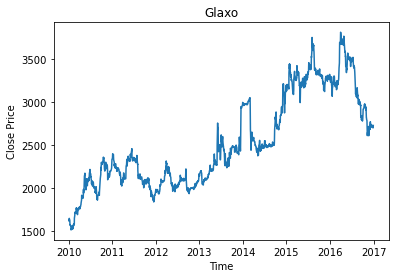

In [19]:
plt.plot(glaxo.Close)
plt.title("Glaxo")
plt.xlabel('Time')
plt.ylabel('Close Price');

Text(0, 0.5, 'Close Price')

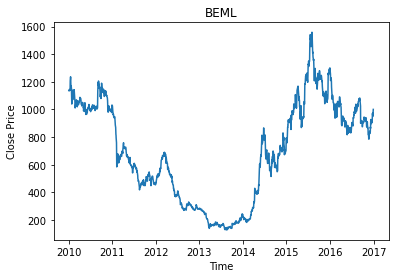

In [21]:
plt.plot(beml.Close)
plt.title("BEML")
plt.xlabel('Time')
plt.ylabel('Close Price')

Gains

In [26]:
# create the gain column using pct_() method
# Gain= closing price(t)-closing price(t-1)/closing price(t-1)
# drop first row since it is NaN

In [31]:
glaxo['gain'] = glaxo.Close.pct_change(periods = 1)
beml['gain'] = beml.Close.pct_change(periods = 1)

In [35]:
glaxo=glaxo.dropna()
beml=beml.dropna()

In [36]:
glaxo.head()  #gain column has been created

,Date,Close,gain
Date,,,
2010-01-05,2010-01-05,1616.80,-0.005444
2010-01-06,2010-01-06,1638.50,0.013422
2010-01-07,2010-01-07,1648.70,0.006225
2010-01-08,2010-01-08,1639.80,-0.005398
2010-01-11,2010-01-11,1629.45,-0.006312


Plotting Gains

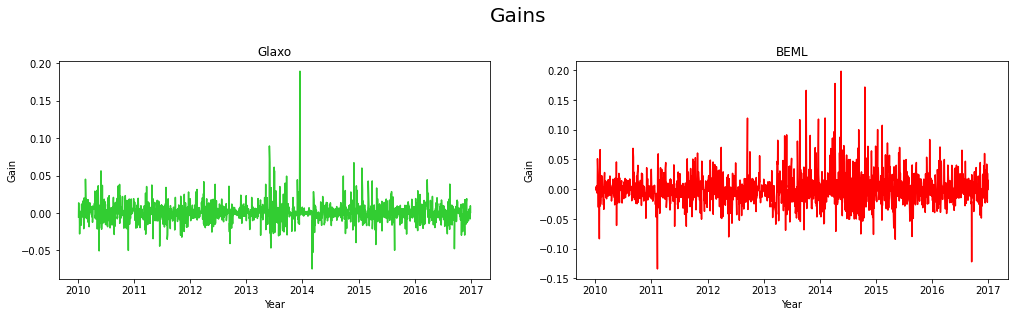

In [75]:
# compared subplots
fig = plt.figure(figsize=(17,4))
plt.suptitle('Gains', size=20, y=1.07) 

plt.subplot(1,2,1)
plt.title("Glaxo")
plt.plot(glaxo.index, glaxo.gain,color="limegreen")
plt.xlabel('Year')
plt.ylabel('Gain');

plt.subplot(1,2,2)
plt.title("BEML")
plt.plot(beml.index,beml.gain,color="red")
plt.xlabel('Year')
plt.ylabel('Gain');
plt.show()

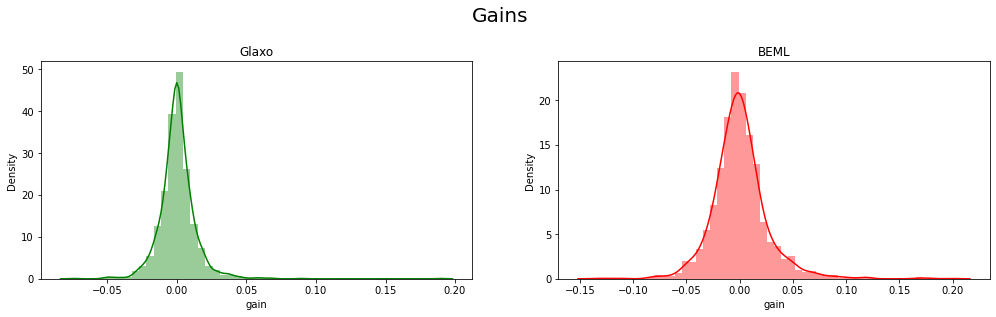

In [90]:
#compared distbribution subplots
fig = plt.figure(figsize=(17,4))
plt.suptitle('Gains', size=20, y=1.07)

plt.subplot(1,2,1)
plt.title("Glaxo")
sn.distplot(glaxo.gain,color="green")
plt.xlabel('gain')
plt.ylabel('Density')

plt.subplot(1,2,2)
plt.title("BEML")
sn.distplot(beml.gain,color="red")
plt.xlabel('gain')
plt.ylabel('Density');

Mean(μ) & Standard Deviation(σ)

In [108]:
#Glaxo
print('Mean:',round(glaxo.gain.mean(), 4))
print('Std:',round(glaxo.gain.std(), 4))

Mean: 0.0004
Std: 0.0134


In [109]:
#BEML
print('Mean:',round(beml.gain.mean(), 4))
print('Std:',round(beml.gain.std(), 4))

Mean: 0.0003
Std: 0.0264


Probability of making 2% Loss or Higher

In [113]:
#Glaxo
stats.norm.cdf(-0.02,glaxo.gain.mean(),glaxo.gain.std())

0.06352488667177397

In [114]:
#BEML
stats.norm.cdf(-0.02,beml.gain.mean(),beml.gain.std())

0.22155987503755292

Probability of making 2% Gain or Higher

In [117]:
#Glaxo
1-stats.norm.cdf(0.02,glaxo.gain.mean(),glaxo.gain.std())

0.07104511457618568

In [122]:
#BEML
1-stats.norm.cdf(0.02,beml.gain.mean(),beml.gain.std())

0.22769829484075343